In [10]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
fb = pd.read_csv('Foreign_Bond.csv')

In [8]:
# drop rows with invalid monthly returns
fb = fb[fb['dret'].notnull()]

# convert string to float
fb['dret'] = fb['dret'].astype(float)

In [13]:
# extract year from date
fb['year'] = fb['caldt'].map(lambda x: floor(x/10000))

# leave out year=2008
fb = fb[fb['year']!=2008]

# calculate annual return
fb['return'] = fb['dret'] + 1 
fb_annual_ret = fb[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
fb_annual_ret = fb_annual_ret.reset_index()

In [17]:
# calculate annualized return
fb_annualized_return = fb_annual_ret['return'].mean()

# calculate annualized standard deviation
fb_annualized_std = fb_annual_ret['return'].std()

# calculate sharpe ratio
fb_sharpe = fb_annualized_return/fb_annualized_std

In [33]:
fb['max'] = 0
for i in range(len(fb)):
    fb['max'][i] = max(fb['dnav'][:i+1])

fb

C:\Users\akize\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,level_0,index,crsp_fundno,caldt,dnav,dret,year,return,max
0,0,1,36536,20090102,84.0504,0.000961,2009.0,1.000961,84
1,1,2,36536,20090105,84.4319,0.004539,2009.0,1.004539,84
2,2,3,36536,20090106,85.4538,0.012103,2009.0,1.012103,85
3,3,4,36536,20090107,85.4443,-0.000111,2009.0,0.999889,85
4,4,5,36536,20090108,84.5894,-0.010005,2009.0,0.989995,85
5,5,6,36536,20090109,84.9801,0.004619,2009.0,1.004619,85
6,6,7,36536,20090112,84.7514,-0.002691,2009.0,0.997309,85
7,7,8,36536,20090113,84.5269,-0.002649,2009.0,0.997351,85
8,8,9,36536,20090114,84.0787,-0.005302,2009.0,0.994698,85
9,9,10,36536,20090115,83.5751,-0.005990,2009.0,0.994010,85


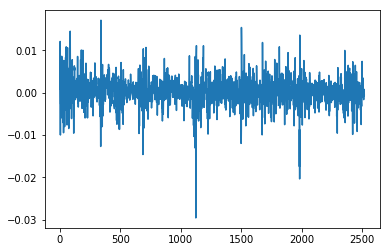

In [20]:
plt.plot(fb['dret'])